In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
df.shape

(8124, 23)

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [7]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [10]:
df.drop('veil-type', axis=1, inplace=True)

In [11]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


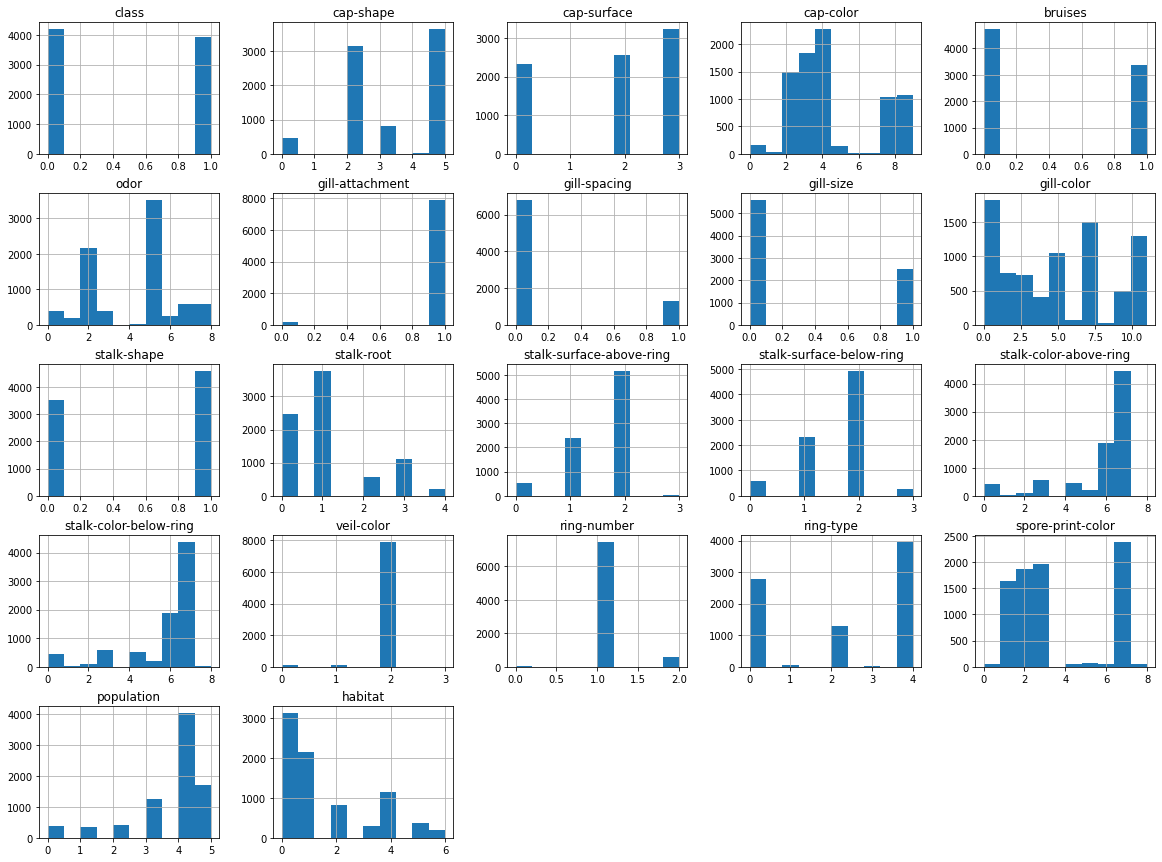

In [12]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

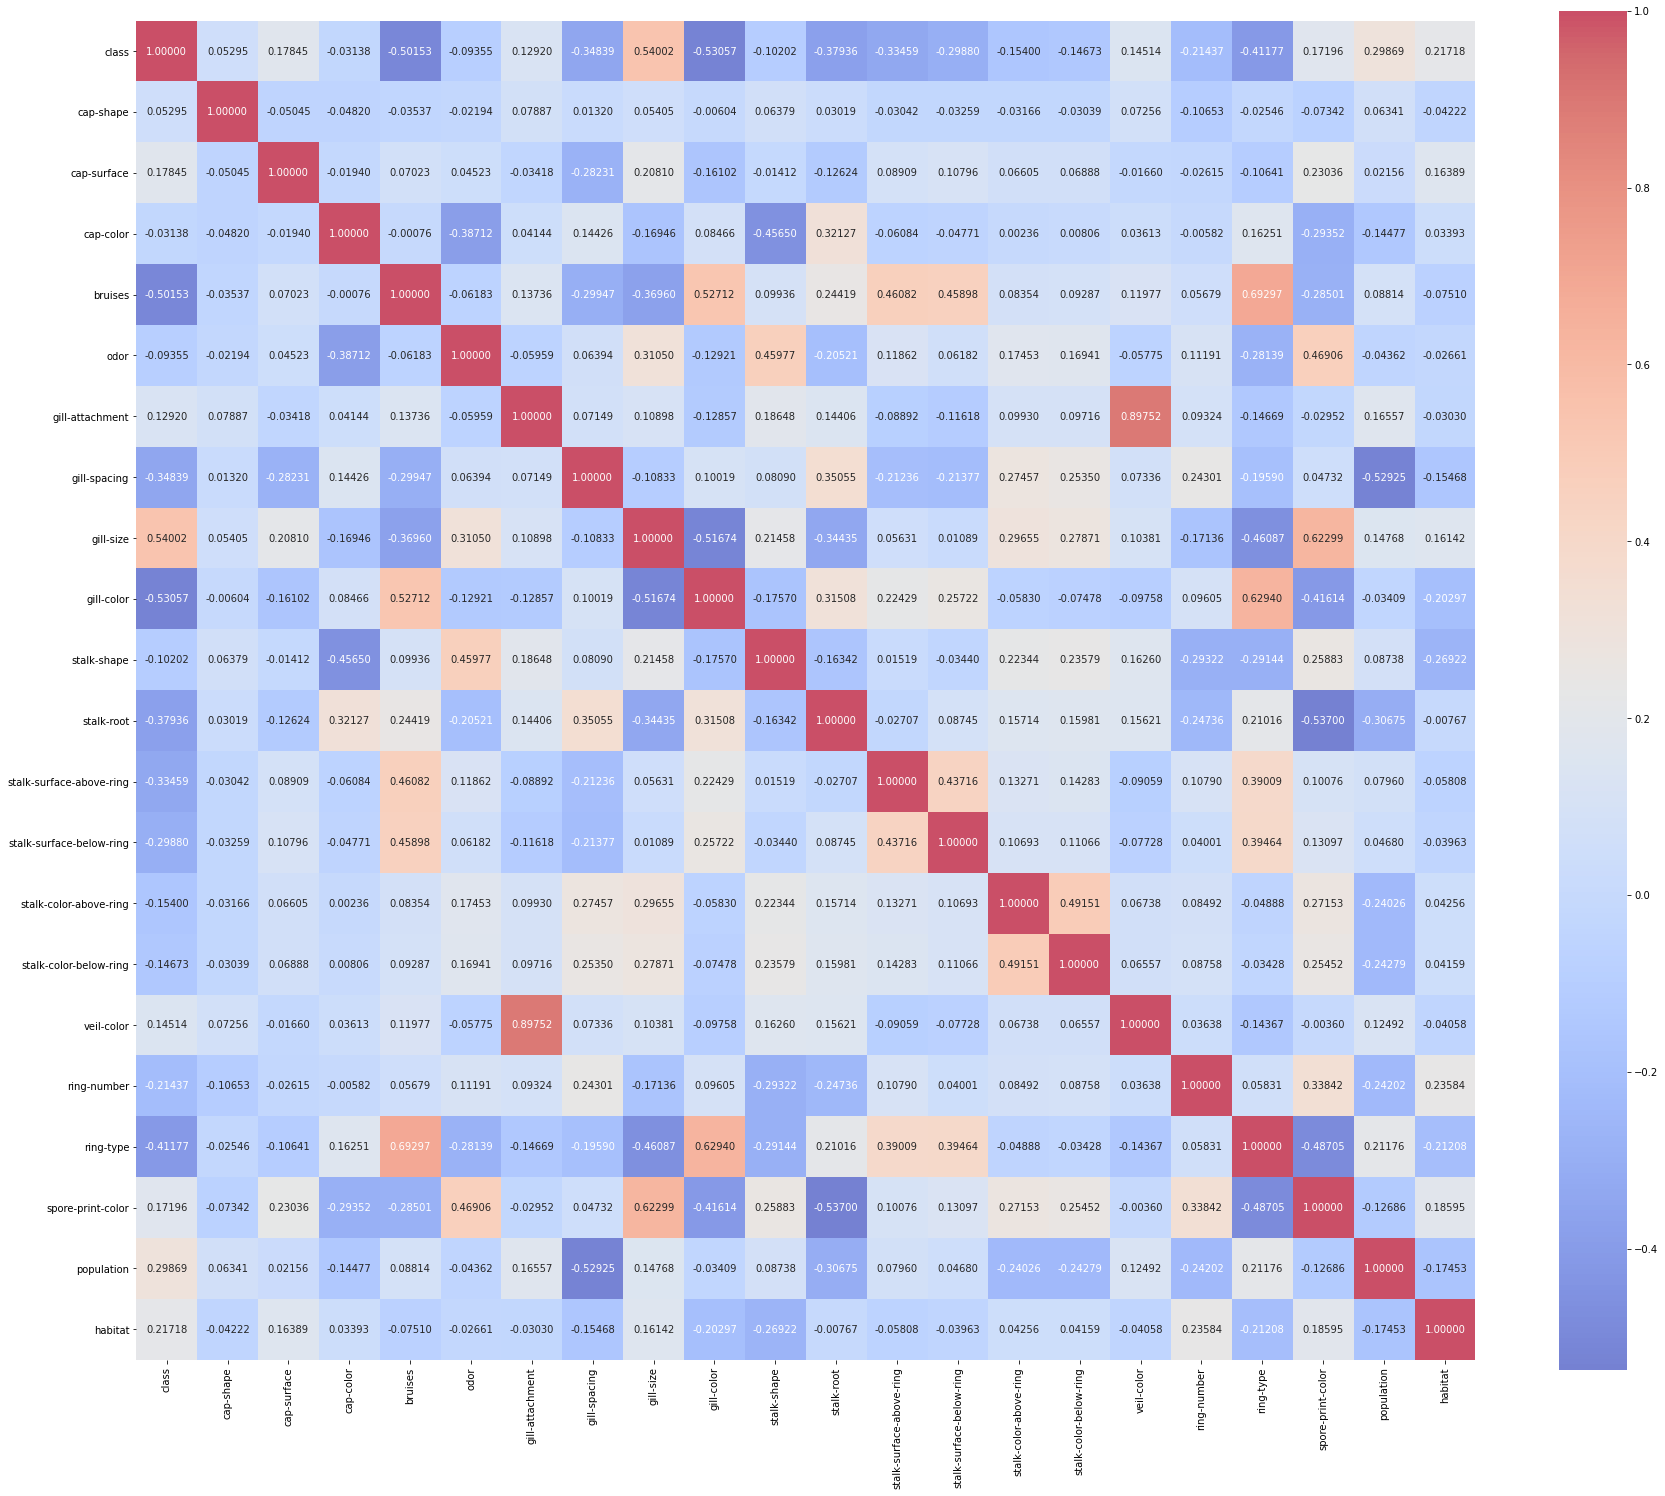

In [13]:
# Data correlation matrix
corr = df.corr()
plt.figure(figsize = (30, 25))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.5f', alpha = 0.7, cmap = 'coolwarm')
plt.show()

In [14]:
X = df.drop(['class','cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-spacing','stalk-shape',
             'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-color','ring-number','ring-type','spore-print-color','population','habitat'],axis=1)
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [16]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'f1': f1, 'cm':cm}

In [17]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree model 
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8664615384615385
F1 Score: 0.8700598802395209
Confusion Matrix:
 [[1363  315]
 [ 119 1453]]


In [18]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('F1 Score:', nb_eval['f1'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8301538461538461
F1 Score: 0.8183015141540487
Confusion Matrix:
 [[1455  223]
 [ 329 1243]]


In [19]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('F1 Score:', knn_eval['f1'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8664615384615385
F1 Score: 0.8700598802395209
Confusion Matrix:
 [[1363  315]
 [ 119 1453]]


In [20]:
# Linear Classifier
from sklearn.linear_model import LogisticRegression

# Building linear model 
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('F1 Score:', lr_eval['f1'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.796923076923077
F1 Score: 0.7857142857142857
Confusion Matrix:
 [[1380  298]
 [ 362 1210]]


In [21]:
# SVC Classifier
from sklearn.svm import SVC

# Building svc model 
svc = SVC()
svc.fit(X_train, y_train)

# Evaluate Model
svc_eval = evaluate_model(svc, X_test, y_test)

# Print result
print('Accuracy:', svc_eval['acc'])
print('F1 Score:', svc_eval['f1'])
print('Confusion Matrix:\n', svc_eval['cm'])

Accuracy: 0.8301538461538461
F1 Score: 0.8183015141540487
Confusion Matrix:
 [[1455  223]
 [ 329 1243]]


In [22]:
print('Accuracy of Decision Tree Classifier:', dtc_eval['acc'])
print('Accuracy of Naive Bayes Classifier:', nb_eval['acc'])
print('Accuracy of KNN Classifier:', knn_eval['acc'])
print('Accuracy of Logistic Regression:', lr_eval['acc'])
print('Accuracy of SV Classifier:', svc_eval['acc'])

Accuracy of Decision Tree Classifier: 0.8664615384615385
Accuracy of Naive Bayes Classifier: 0.8301538461538461
Accuracy of KNN Classifier: 0.8664615384615385
Accuracy of Logistic Regression: 0.796923076923077
Accuracy of SV Classifier: 0.8301538461538461


In [23]:
# ensemble learning
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = DecisionTreeClassifier()
estimators.append(('dtc', model1))
model2 = GaussianNB()
estimators.append(('nb', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
model4 = LogisticRegression()
estimators.append(('linear', model4))
model5 = SVC()
estimators.append(('svm', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7727547731142336


In [24]:
ensemble.fit(X_train,y_train)
ens_eval = evaluate_model(ensemble, X_test, y_test)
print('Accuracy:', ens_eval['acc'])
print('F1 Score:', ens_eval['f1'])
print('Confusion Matrix:\n', ens_eval['cm'])

Accuracy: 0.8301538461538461
F1 Score: 0.8183015141540487
Confusion Matrix:
 [[1455  223]
 [ 329 1243]]
